In [1]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from mlxtend.classifier import EnsembleVoteClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [2]:
url = 'https://github.com/DataQuests/Pandas/raw/master/with_cpep.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,deidnum,GENDER,age_bl,age_3,age_6,age_9,age_12,age_18,age_24,fma,...,HDL 24,ratio_bl,ratio_12,ratio_24,cat_bl,cat_12,cat_24,HomaIR,HomaIR 12,HomaIR 24
0,1057,0,42.01,42.43,42.68,42.93,43.18,43.68,44.18,18.44968,...,1045.045044,2.428571,1.306122,1.051724,1,0.0,0,0.7,1.1,1.2
1,2081,0,39.21,39.60,39.85,40.10,40.35,40.85,41.35,25.62774,...,1027.027026,1.615385,1.145455,1.105263,0,0.0,0,1.2,1.2,1.1
2,2230,0,40.56,40.92,41.17,41.42,41.67,42.17,42.67,26.45387,...,936.936936,2.227273,1.615385,1.134615,1,0.0,0,1.4,1.2,1.2
3,2355,0,26.83,27.30,27.55,27.80,28.05,28.55,29.05,30.86636,...,1243.243242,2.051724,1.844828,0.797101,1,0.0,0,2.0,2.0,2.3
4,2373,0,25.79,26.18,26.43,26.68,26.93,27.43,27.93,22.65525,...,918.918918,1.884615,1.519231,1.529412,0,0.0,0,1.8,0.9,1.1


In [5]:
df = pd.read_csv("withRatio.csv")
#RFE features
#col = ['age_bl', 'fma', 'ffma', 'GENDER', 'B meanumb', 'B meanwst', 'B temp', 'WhtR', 'AGE_WhtR', 'bmi']
#cross validated RFE features (works)
col = ['age_bl', 'fma', 'ffma', 'GENDER', 'B meanumb', 'B temp', 'WhtR', 'AGE_WhtR']
#correlation mapping
#col = ['ffma', 'GENDER', 'B meanwst', 'B meanumb', '1 clinwt', 'AGE_WhtR']
#Phik correlation mapping
#col = ['B meanwst', 'B meanumb', 'bmi', 'ffma', 'GENDER']
#univariate feature
#col = ['ffma', 'GENDER', 'B meanwst', 'B meanumb', '1 clinwt', 'AGE_WhtR', 'B meansbp', 'age_bl', 'B meanbp', 'fma']
#Extra Tree classifiers
#col = ['GENDER', 'fma', 'B temp', 'B meanumb', 'B pulse', 'ffma', 'B meandbp', '1 clinwt', 'AGE_WhtR', 'B meanwst']
X = df[col] 
y = df['cat ']

In [6]:
df.shape

(107, 141)

In [7]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = model_selection.cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.653939393939394, 0.6184848484848485, 0.6246464646464647, 0.6295959595959596, 0.6175757575757574, 0.5973737373737373, 0.6155555555555555, 0.5408080808080807, 0.5862626262626263, 0.5812121212121212, 0.5862626262626263, 0.5973737373737373, 0.5771717171717171, 0.6246464646464647, 0.6044444444444445, 0.5842424242424242, 0.5660606060606059, 0.6135353535353536, 0.5953535353535354, 0.6024242424242424, 0.6024242424242423, 0.5933333333333333, 0.5660606060606059, 0.6246464646464646, 0.5862626262626263, 0.5680808080808081, 0.5862626262626263, 0.5882828282828283, 0.5771717171717171, 0.5953535353535353]


Text(0, 0.5, 'Cross-Validated Accuracy')

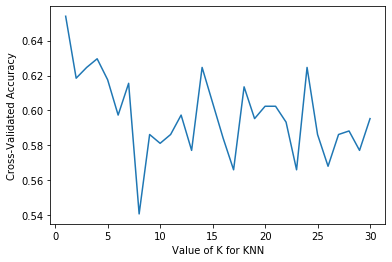

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [9]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = AdaBoostClassifier(random_state=1)
clf5 = SVC()
clf6 = LinearDiscriminantAnalysis()
clf7 = KNeighborsClassifier(n_neighbors=2)
clf8 = DecisionTreeClassifier()

print('10-fold cross validation:\n')

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'AdaBoost', 'SVM', 'LDA', 'KNN', 'CART']

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8], labels):
    
    # for k-fold validation
    #kfold = model_selection.KFold(n_splits=5, random_state=0)
    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=10, 
                                              scoring='accuracy')
         
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

Accuracy: 0.67 (+/- 0.10) [Logistic Regression]


C:\Users\TENN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TENN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TENN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TENN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TENN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Accuracy: 0.65 (+/- 0.12) [Random Forest]
Accuracy: 0.70 (+/- 0.10) [Naive Bayes]
Accuracy: 0.62 (+/- 0.11) [AdaBoost]
Accuracy: 0.58 (+/- 0.09) [SVM]


C:\Users\TENN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TENN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TENN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\TENN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

Accuracy: 0.69 (+/- 0.09) [LDA]
Accuracy: 0.62 (+/- 0.09) [KNN]
Accuracy: 0.63 (+/- 0.16) [CART]


In [11]:
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8], weights=[1,1,1,1,1,1,1,1])

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'AdaBoost', 'SVM', 'LDA', 'KNN', 'CART', 'Ensemble']
for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, eclf], labels):
    # for k-fold validation
    #kfold = model_selection.KFold(n_splits=10, random_state=None)
    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=10, 
                                              scoring='accuracy', 'sensitivity', '')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

SyntaxError: positional argument follows keyword argument (<ipython-input-11-7c7b0fd82de7>, line 11)

In [12]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

X1 = X.to_numpy()
y1 = y.to_numpy()
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels, 
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X1, y=y1, clf=clf)
    plt.title(lab)

NameError: name 'eclf' is not defined

<Figure size 720x576 with 0 Axes>

In [13]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [50]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [51]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [52]:
classifier=xgboost.XGBClassifier()

In [53]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [54]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  25 | elapsed:    0.1s remaining:    0.2s



 Time taken: 0 hours 0 minutes and 0.4 seconds.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished
C:\Users\TENN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [55]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.25, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [56]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.25,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [57]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.25, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [62]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=5)

In [63]:
score

array([0.63636364, 0.77272727, 0.77272727, 0.71428571, 0.7       ])

In [64]:
score.mean()

0.7192207792207792

In [65]:
score.std()

0.05096074771220903